In [1]:
#Import libraries
import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import glob

In [2]:
#Create a list of all file names
filenames_list = sorted(glob.glob('../seq8/seq8/steps/*monitor.csv'))
print('Length of file: ',len(filenames_list)) 
print(filenames_list[5])

Length of file:  11
../seq8/seq8/steps/000000000005.monitor.csv


In [3]:
episodes_list=[]
episodes_list=[('Episode ID', 'Remark')]
# episodes_list.append((16,'Successful with grab'))
print(episodes_list)

[('Episode ID', 'Remark')]


Reward:  -13.0


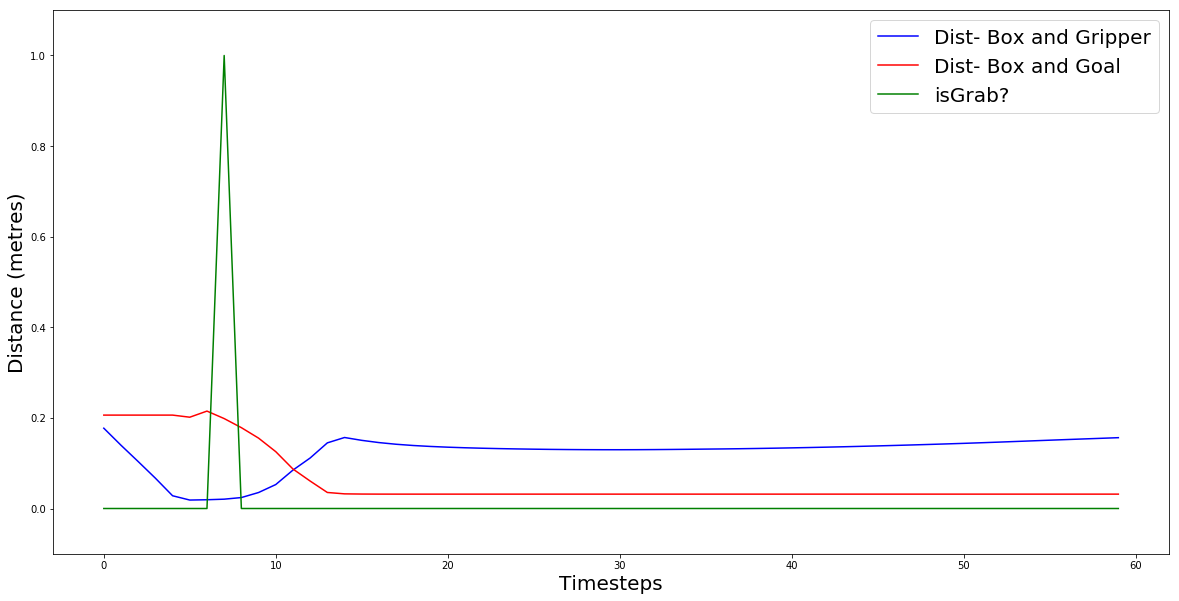

In [9]:
#Enter episode Number here:
episode_num = 4

with open(filenames_list[episode_num]) as csv_file:
    episodeMTX = list(csv.reader(csv_file, delimiter=','))
del episodeMTX[:2]


#Iterate over each episode and collect required data

#Define traits to be collected
distBoxGripper=[]
distBoxGoal=[]
isGrab = []
reward = 0
time_steps_grip=0
movedWoGrab = []
    
for step in episodeMTX:

    dist_box_gripper = ((np.double(step[8])-np.double(step[5]))**2 + (np.double(step[9])-np.double(step[6]))**2 + (np.double(step[10])-np.double(step[7]))**2)**0.5
    distBoxGripper.append(dist_box_gripper)

#     if dist_box_gripper<0.05: #CHANGE LIMIT
#         time_steps_grip+=1

    dist_box_goal = ((np.double(step[8])-np.double(step[11]))**2 + (np.double(step[9])-np.double(step[12]))**2 + (np.double(step[10])-np.double(step[13]))**2)**0.5
    distBoxGoal.append(dist_box_goal)

    isGrab.append(np.double(step[1]))

    reward+=np.double(step[3])

    moved_wo_grab = np.double(step[2])
    movedWoGrab.append(moved_wo_grab)
    
#Plot data
plt.figure(figsize=(20,10))
plt.plot(distBoxGripper,'b')
plt.plot(distBoxGoal,'r')
plt.ylim(-0.1,1.1)
plt.xlabel('Timesteps', fontsize=20)
plt.ylabel('Distance (metres)', fontsize=20)
#plt.plot(movedWoGrab,'purple')
plt.plot(isGrab,'green')
plt.legend(('Dist- Box and Gripper', 'Dist- Box and Goal','isGrab?'), prop={'size': 20})
plt.plot()   
plt.savefig('../outputs/plot01', dpi=600)

# fig = plt.figure(figsize=(20,10))
# ax = plt.axes(xlim=(0,60), ylim=(-0.1, 1.1))
# line, = ax.plot([], [], lw=2)

# def init():
#     line.set_data([], [])
#     return line,

# def animate(i):
#     x = np.linspace(0,60,60)
#     y = distBoxGripper
#     line.set_data(x, y)
#     return line,

# anim = animation.FuncAnimation(fig, animate, init_func=init,
#                                frames=200, interval=20, blit=True)

# anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

# plt.show()

    
    






print('Reward: ',reward)

In [5]:
episodes_list=[]
add_to_log = input()
if (add_to_log=='yes'):
    episode_id = episode_num
    print('Enter Remark')
    remark = input()
    episodes_list.append((episode_id,remark))

In [6]:
print(episodes_list)
np.save('../outputs/episodesVarietyList.npy',episodes_list)

[]


## Plot Various types of Episodes:



In [7]:
varietyList = list(np.load('../outputs/episodesVarietyList.npy'))
print(varietyList)

[]


In [ ]:
#Enter episode Number here:

#varietyList = np.delete(varietyList,(0,:)
varietyList = list(np.load('../outputs/episodesVarietyList.npy'))



# print(varietyList)


for i in range(len(varietyList)):
#     print(varietyList[i][0])
    episode_num = np.int_(varietyList[i][0])
#     print(type(episode_num))

    
    with open(filenames_list[episode_num]) as csv_file:
        episodeMTX = list(csv.reader(csv_file, delimiter=','))
    del episodeMTX[:2]


    #Iterate over each episode and collect required data

    #Define traits to be collected
    distBoxGripper=[]
    distBoxGoal=[]
    isGrab = []
    reward = 0
    time_steps_grip=0
    movedWoGrab = []

    for step in episodeMTX:

        dist_box_gripper = ((np.double(step[8])-np.double(step[5]))**2 + (np.double(step[9])-np.double(step[6]))**2 + (np.double(step[10])-np.double(step[7]))**2)**0.5
        distBoxGripper.append(dist_box_gripper)

    #     if dist_box_gripper<0.05: #CHANGE LIMIT
    #         time_steps_grip+=1

        dist_box_goal = ((np.double(step[8])-np.double(step[11]))**2 + (np.double(step[9])-np.double(step[12]))**2 + (np.double(step[10])-np.double(step[13]))**2)**0.5
        distBoxGoal.append(dist_box_goal)

        isGrab.append(np.double(step[1]))

        reward+=np.double(step[3])

        moved_wo_grab = np.double(step[2])
        movedWoGrab.append(moved_wo_grab)




    
    
    print(varietyList[i][0])
    #Plot data
    plt.figure(figsize=(20,12))
    plt.plot(distBoxGripper,'b',linewidth=4)
    plt.plot(distBoxGoal,'r',linewidth=4)
    plt.ylim(-0.1,1.1)
    plt.xlabel('Timesteps', fontsize=25,fontweight='bold')
    plt.ylabel('Distance (Mujoco Units)', fontsize=25,fontweight='bold')
    plt.xticks(fontsize=25, rotation=0)
    plt.yticks(fontsize=25, rotation=0)
    #plt.plot(movedWoGrab,'purple')
    plt.plot(isGrab,'green',linewidth=4)
    plt.legend(('Dist b/w Box and Gripper', 'Dist b/w Box and Goal','isGrab?','Reward: ',reward), prop={'size': 25})
    plt.title(varietyList[i][1], fontsize=25,fontweight='bold')
    plt.text(0,0.8,'Reward: %.1f'%reward+varietyList[i][0], fontsize=25,fontweight='bold')
    plt.plot()
    fig_id = str(i)
    #plt.savefig(../outputs/'plot'+fig_id, dpi=600)
    plt.savefig('plot01', dpi=600)


In [ ]:
varietyList = list(np.load('../outputs/episodesVarietyList.npy'))


varietyList[1][1] = 'Unsuccessful with Single Grab'
varietyList[2][1] = 'Unsuccessful with Multiple Grabs'
varietyList[3][1] = 'Unsuccessful Attempt'
varietyList[4][1] = 'Unsuccessful- No Box Movement'
varietyList[6][1] = 'Successful Attempt with Multiple Grabs'
varietyList[7][1] = 'Unsuccessful Attempt with Multiple Grabs'
varietyList[8][1] = 'Unsuccessful Attempt with Single Grab'
varietyList[8][1] = 'Unsuccessful Attempt with Multiple Grabs'
varietyList[12][1] = 'Unsuccessful Attempt with Punch'
varietyList[13][1] = 'Successful Attempt with Punch'
varietyList[14][1] = 'Successful Attempt with Punch'

del varietyList[0]
print(varietyList)

In [ ]:



fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()
